In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('energy_dataset.csv', parse_dates = ['time'])
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
data.time = pd.to_datetime(data.time, utc = True, infer_datetime_format= True)
data = data.set_index('time')
data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
data.isnull().sum()

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [ ]:
# Count number of zeros in all columns of Dataframe
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print(f"{column_name:{50}} : {count}")

generation biomass                                 : 4
generation fossil brown coal/lignite               : 10517
generation fossil coal-derived gas                 : 35046
generation fossil gas                              : 1
generation fossil hard coal                        : 3
generation fossil oil                              : 3
generation fossil oil shale                        : 35046
generation fossil peat                             : 35046
generation geothermal                              : 35046
generation hydro pumped storage aggregated         : 0
generation hydro pumped storage consumption        : 12607
generation hydro run-of-river and poundage         : 3
generation hydro water reservoir                   : 3
generation marine                                  : 35045
generation nuclear                                 : 3
generation other                                   : 4
generation other renewable                         : 3
generation solar                     

In [ ]:
data.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
           'generation wind offshore', 'generation fossil coal-derived gas',
           'generation fossil oil shale', 'generation fossil peat', 'generation marine',
           'generation wind offshore', 'generation geothermal'], inplace = True, axis = 1)

In [ ]:
data.isnull().sum()

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0


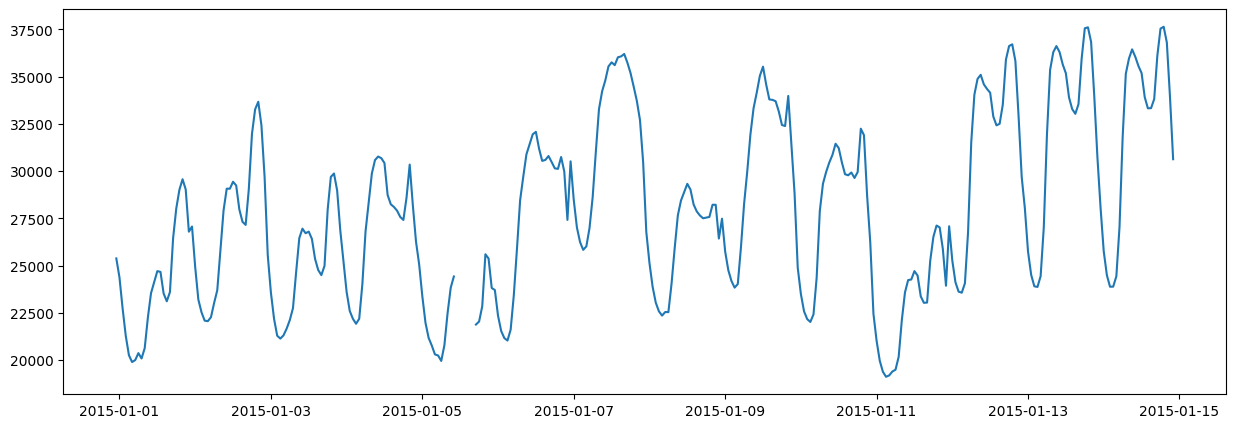

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(data['total load actual'][:24*7*2])

In [ ]:
# Linear Interpolate the missing values in the dataset
data.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)
data.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

In [ ]:
data.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.531343,448.094570,5622.700647,4256.531271,298.342417,475.582706,972.201902,2605.534123,6263.483430,60.226030,85.634326,1432.818546,269.418692,5464.980450,1439.066735,5471.216689,28712.129962,28698.281385,49.874341,57.884023
std,85.346266,354.618269,2201.510984,1961.988937,52.519927,792.312704,400.712304,1835.175078,840.272333,20.238792,14.076948,1679.961733,50.218423,3213.586296,1677.703355,3176.312853,4594.100854,4575.828854,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1078.000000,5759.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,69.000000,2979.000000,24793.750000,24807.000000,41.490000,49.347500
50%,367.000000,509.000000,4969.500000,4475.000000,300.000000,68.000000,906.000000,2165.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4849.500000,576.000000,4855.000000,28906.000000,28902.000000,50.520000,58.020000
75%,433.000000,757.000000,6429.000000,5839.000000,330.000000,616.000000,1250.000000,3758.000000,7025.000000,80.000000,97.000000,2579.000000,310.000000,7399.500000,2636.000000,7353.000000,32263.250000,32194.250000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [ ]:
data.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [ ]:
# creating a new column to sum the total Generationof power
data['total generation'] = data['generation biomass'] + data['generation fossil brown coal/lignite'] + data['generation fossil gas'] + data['generation fossil hard coal'] + data['generation fossil oil'] + data['generation hydro pumped storage consumption'] + data['generation hydro run-of-river and poundage'] + data['generation hydro water reservoir'] + data['generation nuclear'] + data['generation other'] + data['generation other renewable'] + data['generation solar'] + data['generation waste'] + data['generation wind onshore']



In [ ]:
data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,total generation
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,28251.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,27818.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,26796.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,25223.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,24620.0


<Axes: ylabel='Density'>

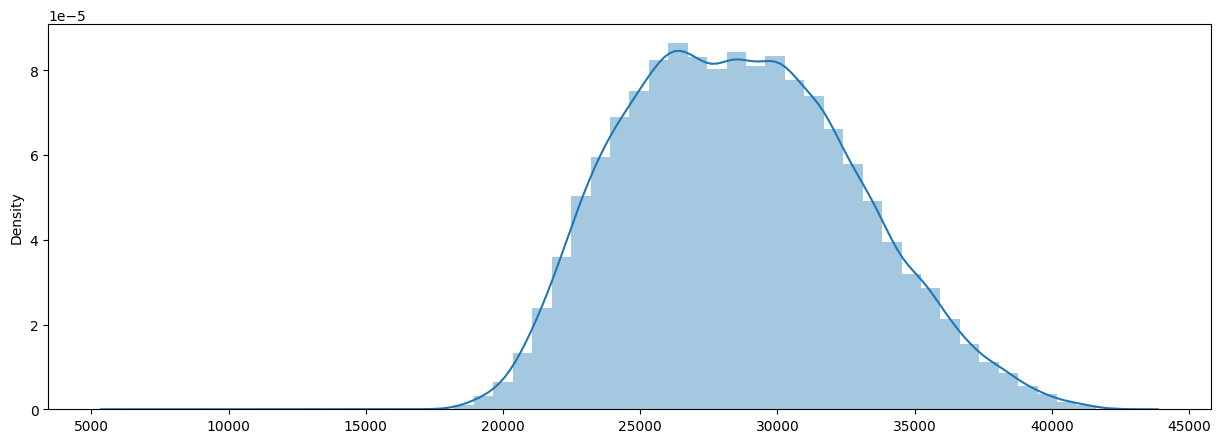

In [ ]:
# Total Generation
sns.distplot(x= data['total generation'], kde = True)

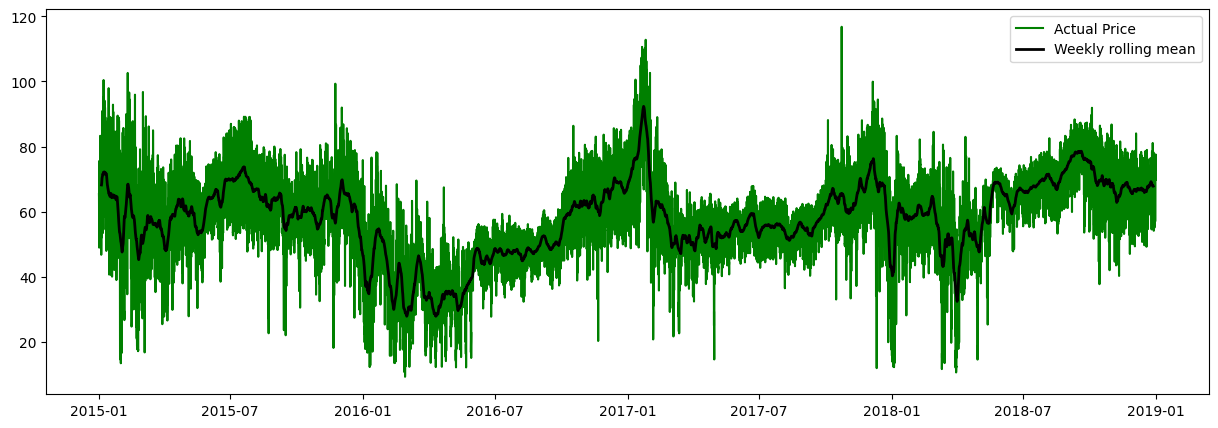

In [ ]:
#Ploting the actual hourly electricity price and its rolling mean over a week
fig, ax = plt.subplots(1,1)
rolling = data['price actual'].rolling(24*7, center = True).mean()
ax.plot(data['price actual'], color = 'g', label='Actual Price')
ax.plot(rolling, color = 'black', linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.legend()
plt.show()

[]

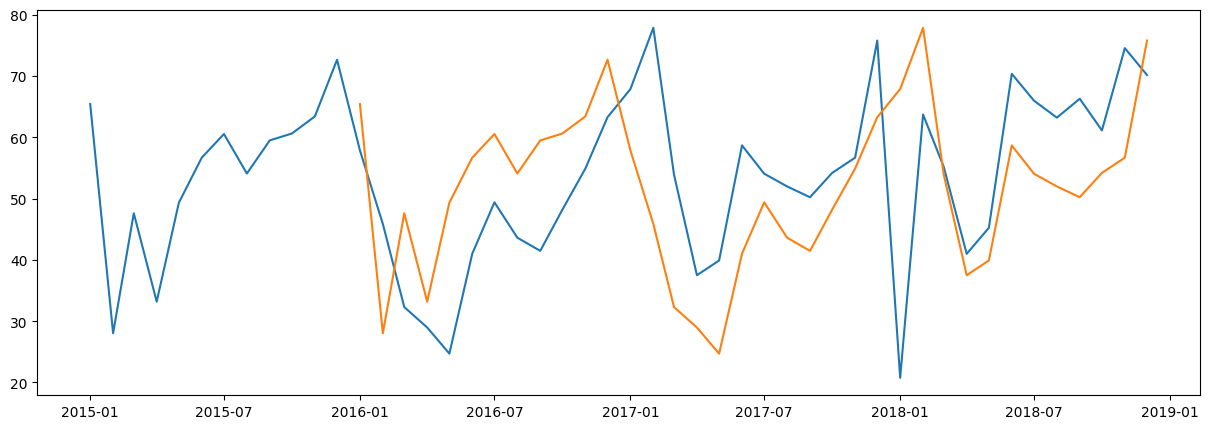

In [ ]:
# Plot the electricity prie (month wise) along with 1st year lagg
monthly_price = data['price actual'].asfreq('M')
lagged = monthly_price.shift(12)

fig, ax = plt.subplots(1,1)
ax.plot(monthly_price, label = 'Monthly Price')
ax.plot(lagged, label ='1 yr lagged')
plt.plot()

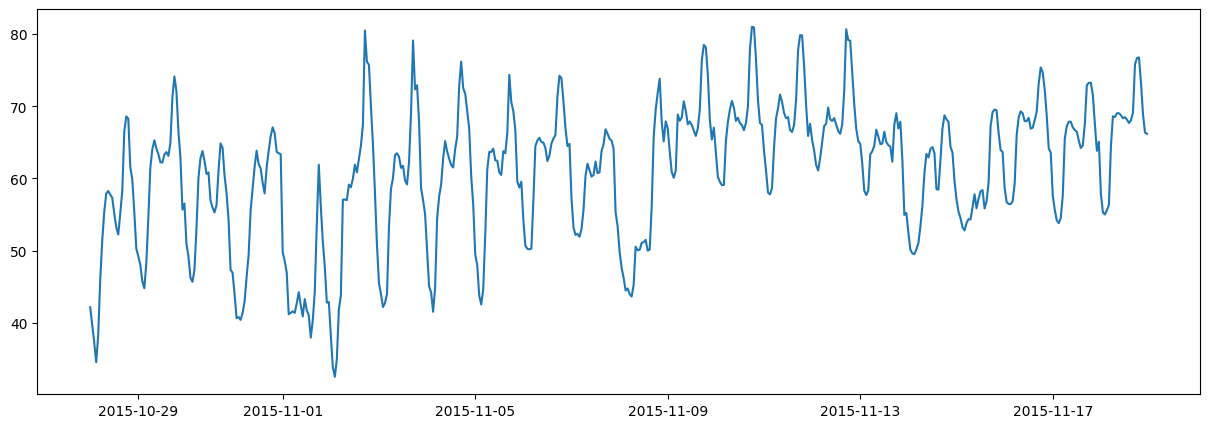

In [ ]:
# Plotting hourly data of 3 weeks
start = 1+ 24*300
end = 1+ 24*322

plt.plot(data['price actual'][start:end])

<Axes: ylabel='Density'>

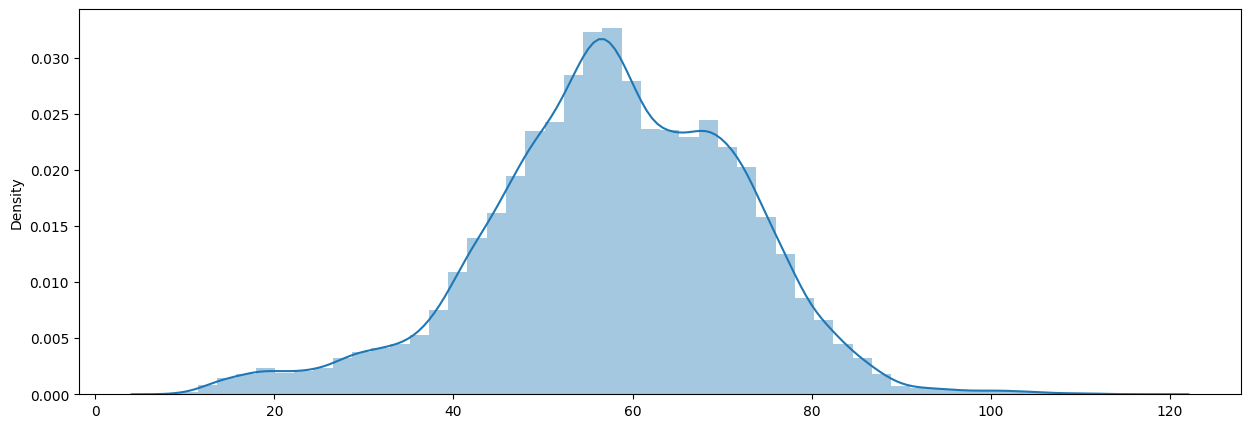

In [ ]:
# Plotting the histogram
sns.distplot(x = data['price actual'], kde = True)

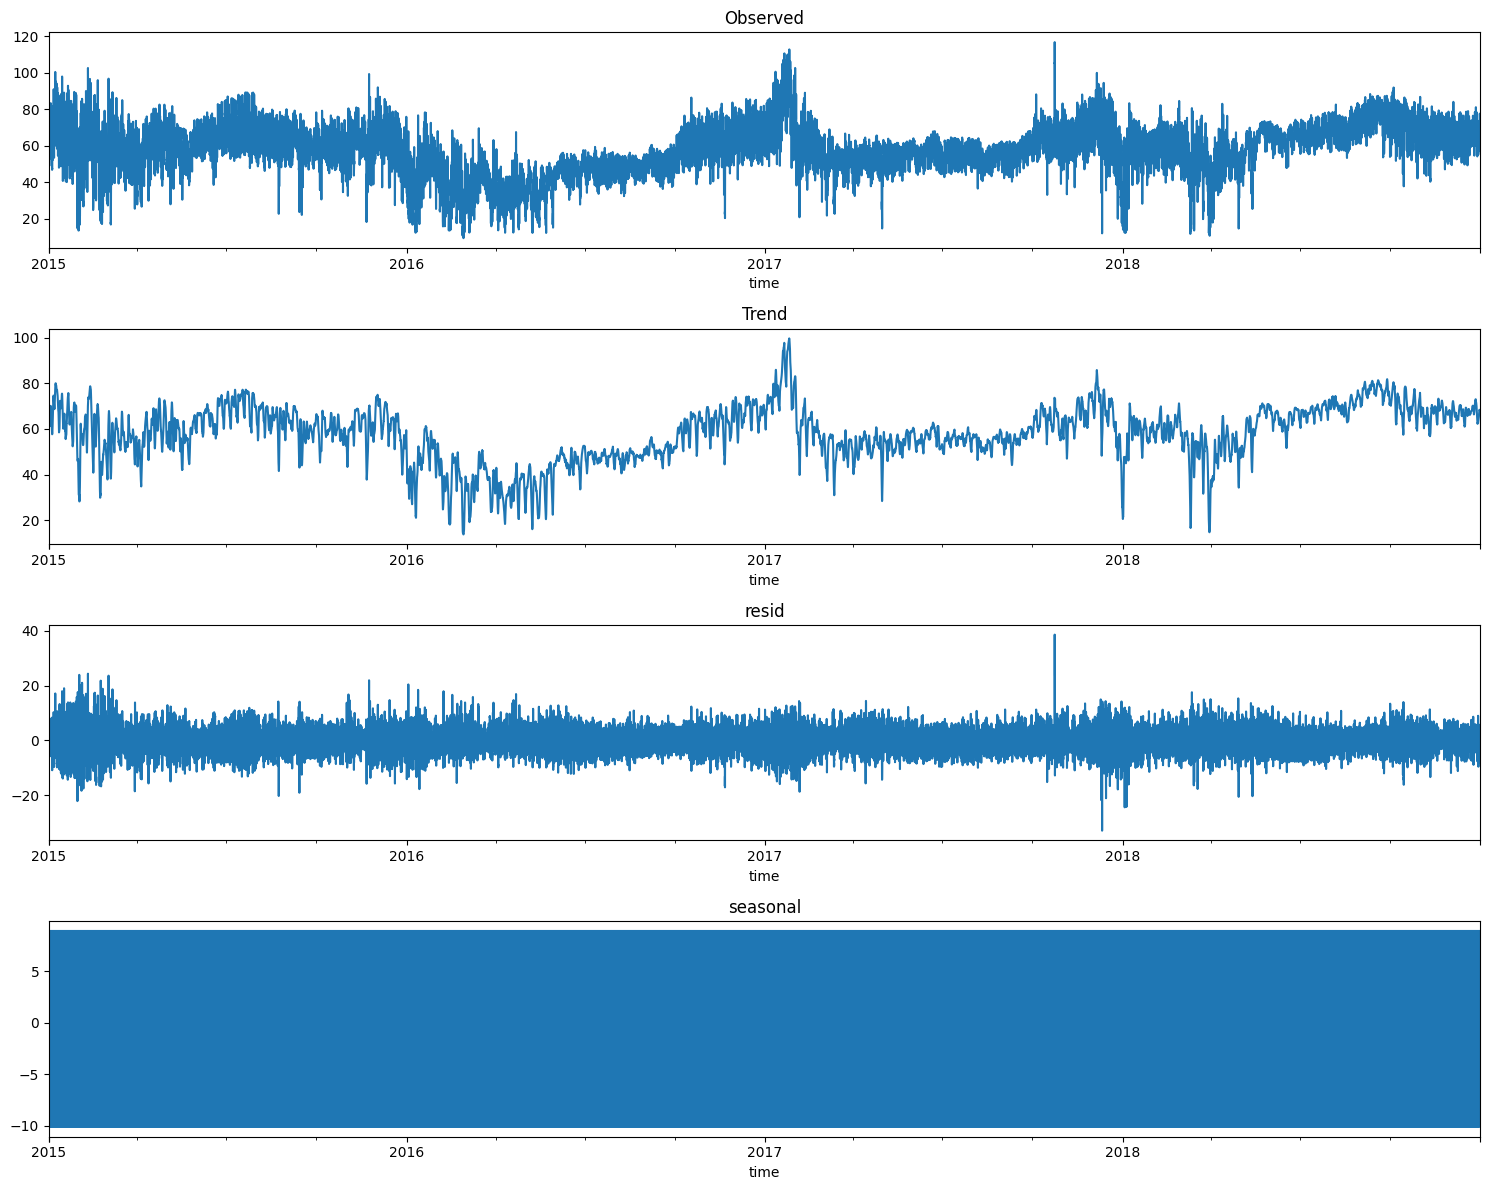

In [ ]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(data['price actual'], model = 'additive')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,12))
res.observed.plot(ax=ax1, title= 'Observed')
res.trend.plot(ax=ax2, title = 'Trend')
res.resid.plot(ax=ax3, title = 'resid')
res.seasonal.plot(ax= ax4, title = 'seasonal')
plt.tight_layout()
plt.show()

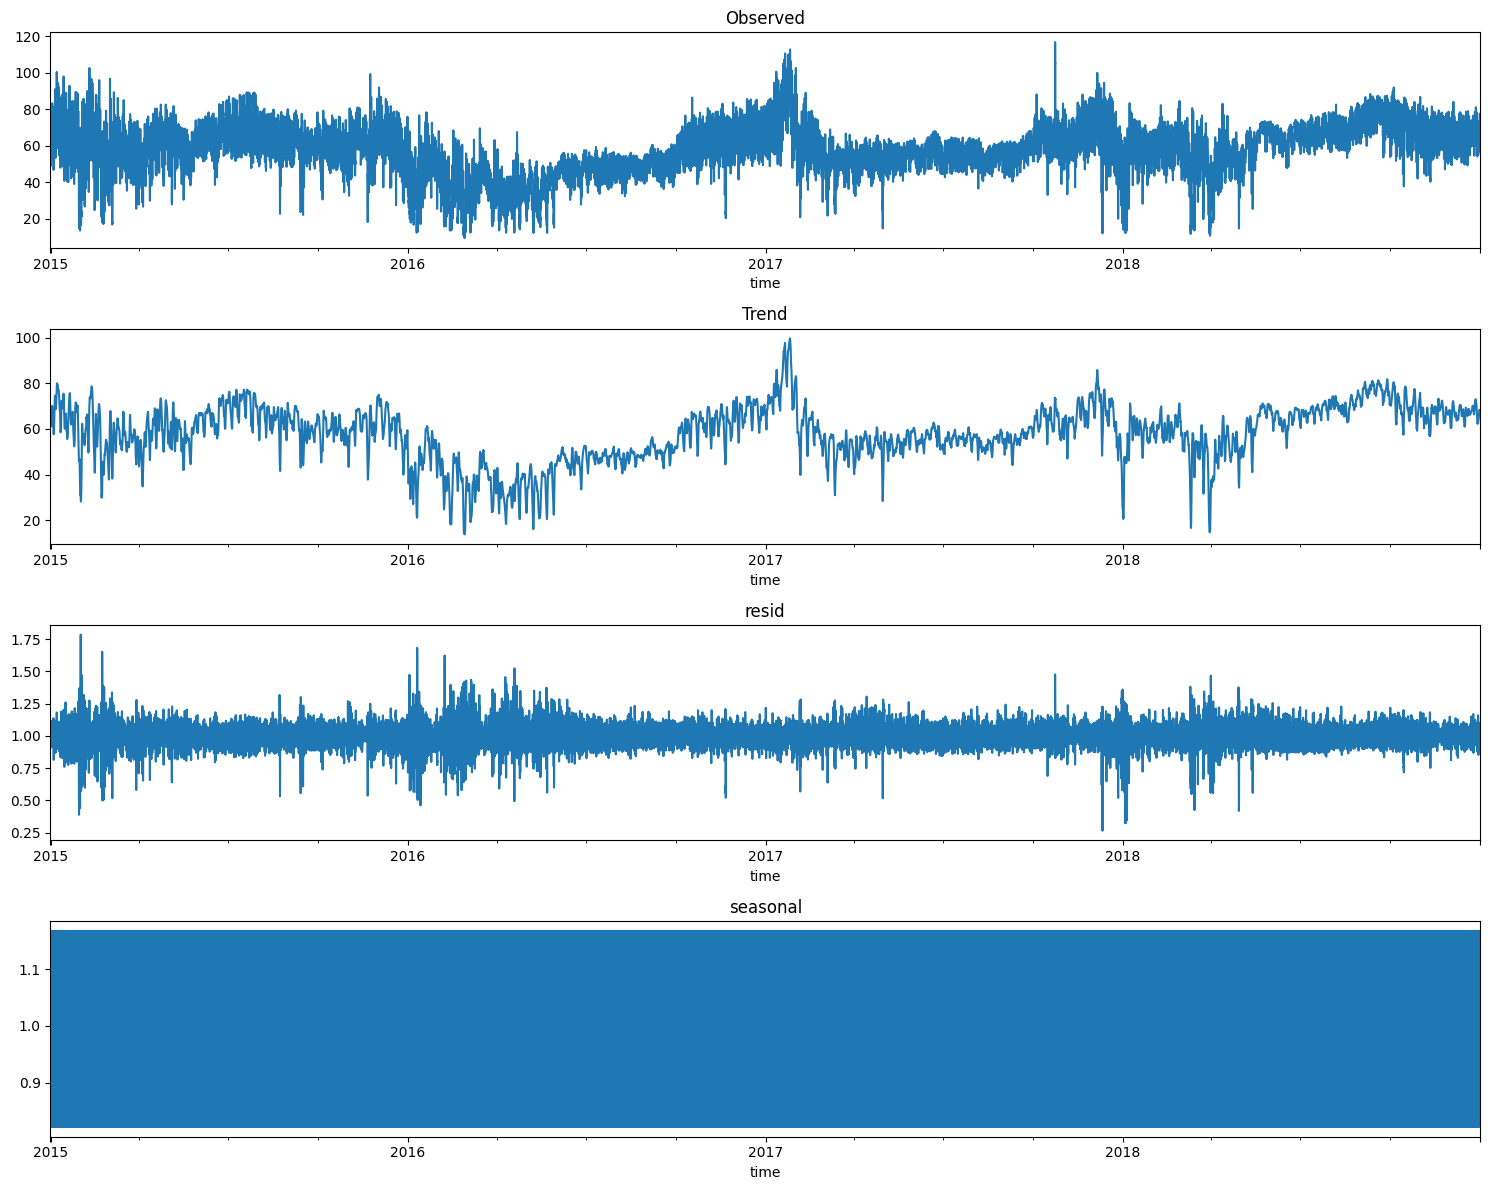

In [ ]:
res = sm.tsa.seasonal_decompose(data['price actual'], model = 'multiplicative')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,12))
res.observed.plot(ax=ax1, title= 'Observed')
res.trend.plot(ax=ax2, title = 'Trend')
res.resid.plot(ax=ax3, title = 'resid')
res.seasonal.plot(ax= ax4, title = 'seasonal')
plt.tight_layout()
plt.show()

In [ ]:
#ADFuller
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['price actual'], autolag = 'AIC')
print(f'ADF Stats: {result[0]}')
print(f'n-lags: {result[2]}')
print(f'p-value: {round(result[1], 6)}')

for key, value in result[4].items():
  print(f'Critical Values:')
  print(f' {key} :  {value}')

ADF Stats: -9.147016232851248
n-lags: 50
p-value: 0.0
Critical Values:
 1% :  -3.4305367814665044
Critical Values:
 5% :  -2.8616225527935106
Critical Values:
 10% :  -2.566813940257257


In [ ]:
from prompt_toolkit.key_binding import key_processor
# KPSS
from statsmodels.tsa.stattools import kpss
result = kpss(data['price actual'])
print(f'ADF Stats: {result[0]}')
print(f'n-lags: {result[2]}')
print(f'p-value: {result[1]}')

for key, value in result[3].items():
  print(f'Critical Values:')
  print(f' {key} :  {value}')

ADF Stats: 4.330033575195487
n-lags: 105
p-value: 0.01
Critical Values:
 10% :  0.347
Critical Values:
 5% :  0.463
Critical Values:
 2.5% :  0.574
Critical Values:
 1% :  0.739


<ipython-input-25-dabaa2717dc6>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(data['price actual'])


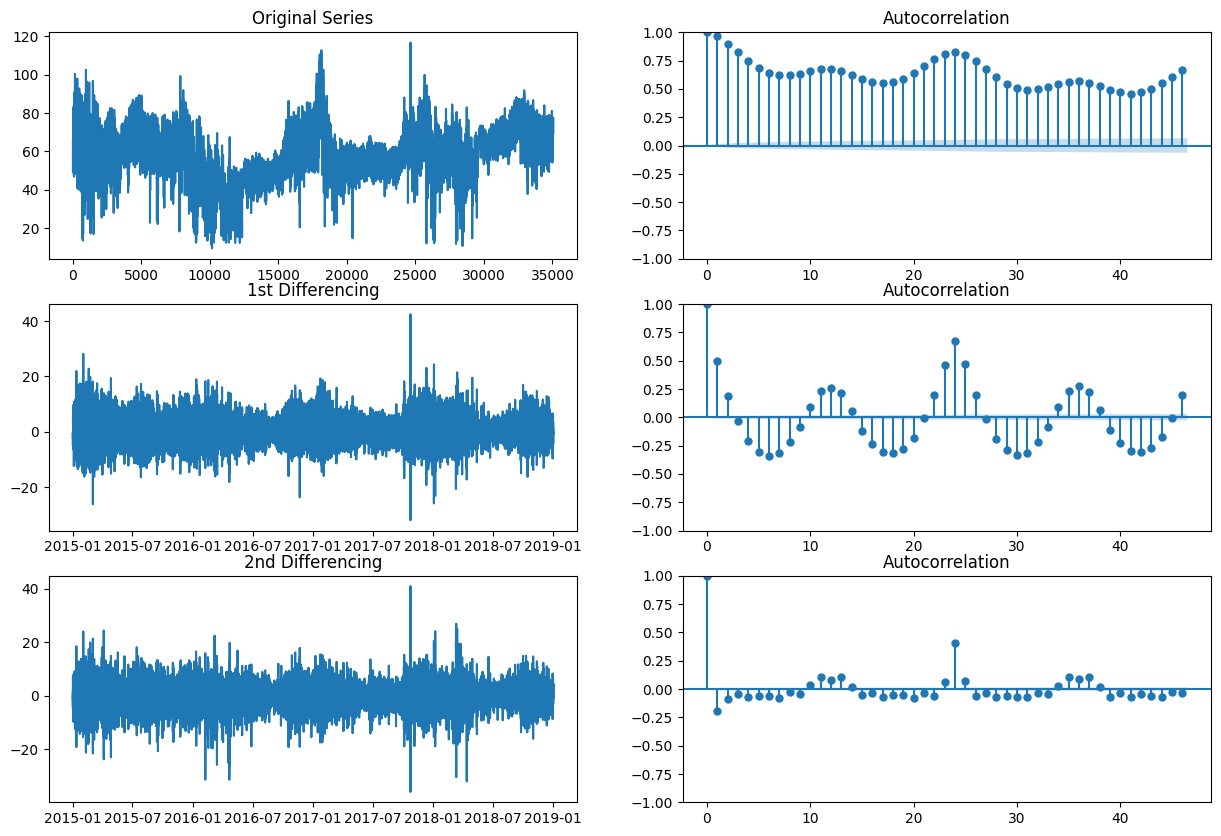

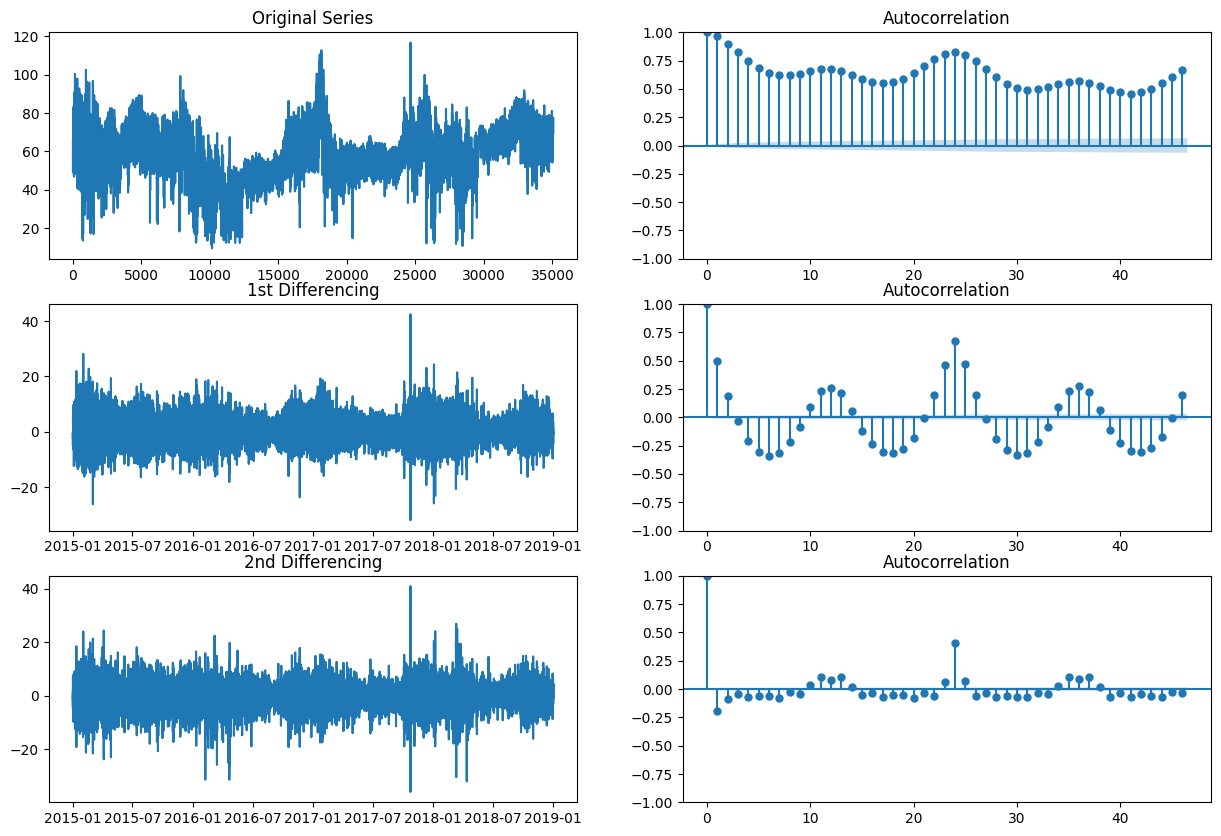

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plotting ACF graph with original series, 1st Differencing, 2nd Diferencing

fig, axes = plt.subplots(3,2, figsize = (15,10))

axes[0,0].plot(data['price actual'].values)
axes[0,0].set_title('Original Series')
plot_acf(data['price actual'].dropna(), ax = axes[0,1])

axes[1,0].plot(data['price actual'].diff())
axes[1,0].set_title('1st Differencing')
plot_acf(data['price actual'].diff().dropna(), ax = axes[1,1])

axes[2,0].plot(data['price actual'].diff().diff())
axes[2,0].set_title('2nd Differencing')
plot_acf(data['price actual'].diff().diff().dropna(), ax = axes[2,1])

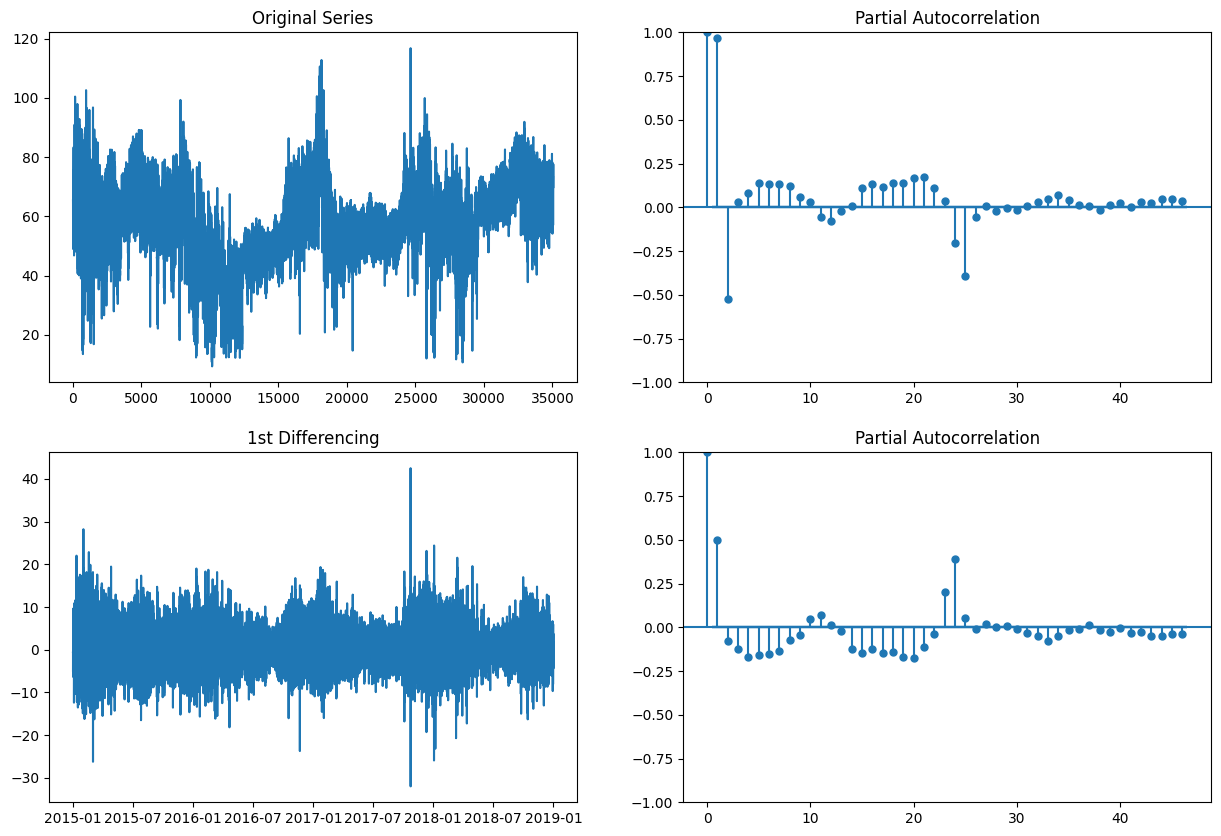

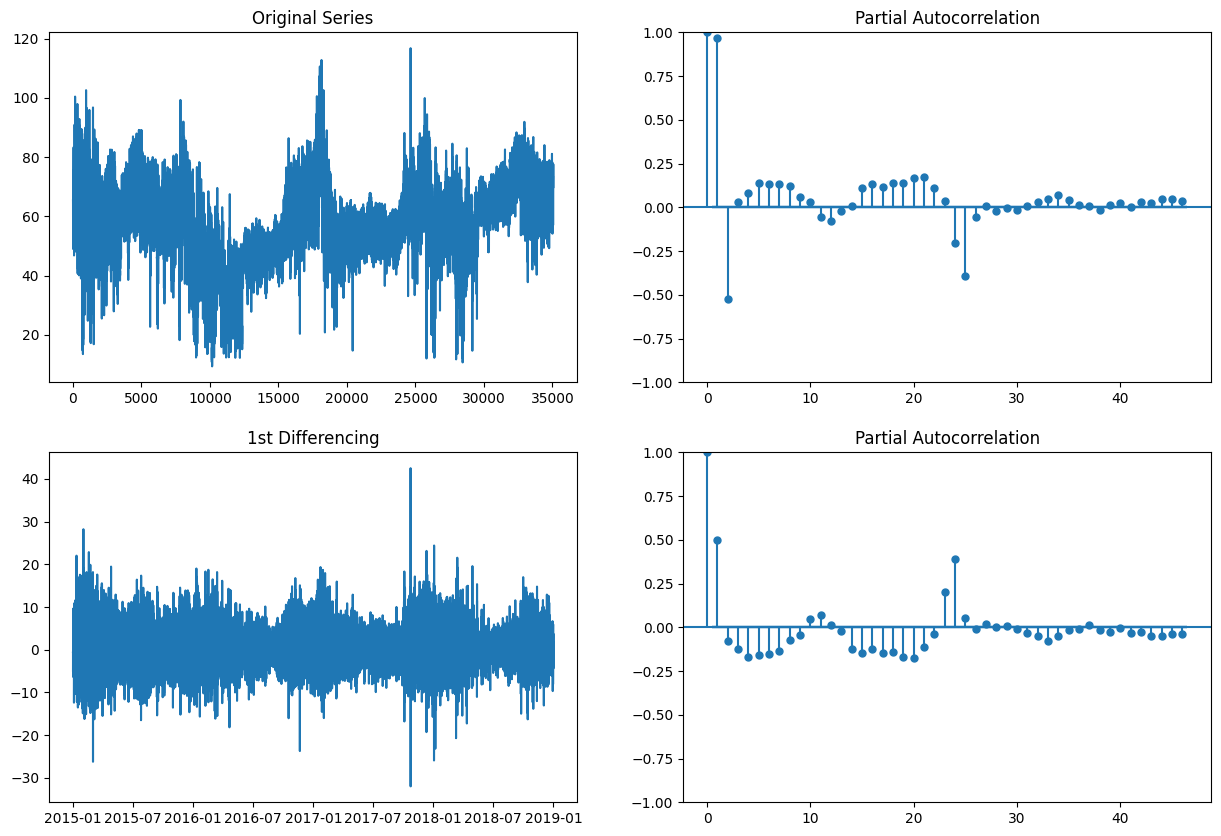

In [ ]:
#Plotting PACF graph with the 1st Differenced values of the column
fig, axes = plt.subplots(2,2, figsize = (15,10))

axes[0,0].plot(data['price actual'].values)
axes[0,0].set_title('Original Series')
plot_pacf(data['price actual'].dropna(), ax = axes[0,1])

axes[1,0].plot(data['price actual'].diff())
axes[1,0].set_title('1st Differencing')
plot_pacf(data['price actual'].diff().dropna(), ax = axes[1,1])

In [ ]:
def prepare_dataset(data, size):
  x_data = []
  y_data = []

  l = len(data) - size

  for i in range(l):
    x = data[i:i+size]
    y = data[i+size]
    x_data.append(x)
    y_data.append(y)

  return np.array(x_data), np.array(y_data)

In [ ]:
def plot_model_rmse_and_loss(history, title):

    # Evaluate train and validation accuracies and losses

    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Visualize epochs vs. train and validation accuracies and losses

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')

    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')

    plt.suptitle(title, fontweight = 'bold',  fontsize= 15)

    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_filtered = data['price actual'].values

scaler = MinMaxScaler(feature_range = (0,1))

scaled_data = scaler.fit_transform(data_filtered.reshape(-1,1))
scaled_data.shape

(35064, 1)

In [ ]:
train_size = int(np.ceil(len(scaled_data) * 0.8))
test_size = int((len(scaled_data) - train_size) *0.5)
print(train_size, test_size)

28052 3506


In [ ]:
xtrain, ytrain = prepare_dataset(scaled_data[:train_size], 25)
xval, yval = prepare_dataset(scaled_data[train_size-25:train_size +test_size], 25)
xtest, ytest = prepare_dataset(scaled_data[train_size + test_size-25:], 25)
print(xtrain.shape)
print(xval.shape)
print(xtest.shape)

(28027, 25, 1)
(3506, 25, 1)
(3506, 25, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, Flatten, SimpleRNN
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
optimizer = tf.keras.optimizers.Adam()
early_stopping = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)]

In [ ]:
model_SimpleRNN = Sequential()
model_SimpleRNN.add(SimpleRNN(28, re1turn_sequences = True, input_shape = (xtrain.shape[1], 1)))
model_SimpleRNN.add(SimpleRNN(64, return_sequences = False))
model_SimpleRNN.add(Dense(64))
model_SimpleRNN.add(Dropout(0.2))
model_SimpleRNN.add(Dense(1))
model_SimpleRNN.compile(loss = loss, metrics = metric, optimizer = optimizer)

history = model_SimpleRNN.fit(xtrain, ytrain, epochs = 60, validation_data =(xval,yval), callbacks = early_stopping)

Epoch 1/60
876/876 [==============================] - 19s 18ms/step - loss: 0.0082 - root_mean_squared_error: 0.0905 - val_loss: 5.0991e-04 - val_root_mean_squared_error: 0.0226
Epoch 2/60
876/876 [==============================] - 19s 22ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 4.0135e-04 - val_root_mean_squared_error: 0.0200
Epoch 3/60
876/876 [==============================] - 18s 20ms/step - loss: 0.0013 - root_mean_squared_error: 0.0364 - val_loss: 4.2073e-04 - val_root_mean_squared_error: 0.0205
Epoch 4/60
876/876 [==============================] - 15s 17ms/step - loss: 0.0012 - root_mean_squared_error: 0.0342 - val_loss: 6.5107e-04 - val_root_mean_squared_error: 0.0255
Epoch 5/60
876/876 [==============================] - 17s 20ms/step - loss: 0.0010 - root_mean_squared_error: 0.0316 - val_loss: 6.7946e-04 - val_root_mean_squared_error: 0.0261
Epoch 6/60
876/876 [==============================] - 15s 17ms/step - loss: 9.2018e-04 - root_mean_squared_err

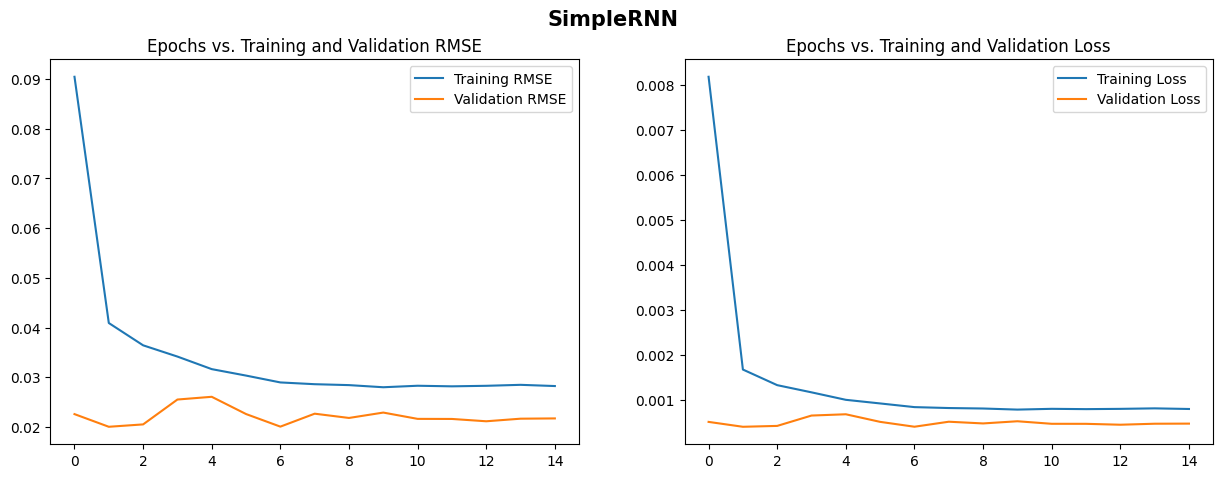

In [ ]:
plot_model_rmse_and_loss(history,"SimpleRNN")

In [ ]:
predictions = model_SimpleRNN.predict(xtest)
predictions = scaler.inverse_transform(predictions)
simplernn_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
print(f"Root Mean Squarred Error for SimpleRNN = {simplernn_rmse}")

110/110 [==============================] - 3s 13ms/step
Root Mean Squarred Error for SimpleRNN = 70.96717141535989


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, Flatten, SimpleRNN
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
optimizer = tf.keras.optimizers.Adam()
early_stopping = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)]

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, input_shape = (xtrain.shape[1], 1)))
model_LSTM.add(Flatten())
model_LSTM.add(Dense(128, activation = 'relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(64, activation = 'relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss = loss, metrics = metric, optimizer = optimizer)

history = model_LSTM.fit(xtrain, ytrain, epochs = 60, validation_data =(xval , yval), callbacks = early_stopping)

Epoch 1/60
876/876 [==============================] - 35s 37ms/step - loss: 0.0045 - root_mean_squared_error: 0.0668 - val_loss: 7.4714e-04 - val_root_mean_squared_error: 0.0273
Epoch 2/60
876/876 [==============================] - 32s 37ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 5.4536e-04 - val_root_mean_squared_error: 0.0234
Epoch 3/60
876/876 [==============================] - 31s 36ms/step - loss: 0.0014 - root_mean_squared_error: 0.0380 - val_loss: 5.5125e-04 - val_root_mean_squared_error: 0.0235
Epoch 4/60
876/876 [==============================] - 31s 35ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 5.3291e-04 - val_root_mean_squared_error: 0.0231
Epoch 5/60
876/876 [==============================] - 34s 39ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 4.6875e-04 - val_root_mean_squared_error: 0.0217
Epoch 6/60
876/876 [==============================] - 31s 35ms/step - loss: 0.0010 - root_mean_squared_error: 

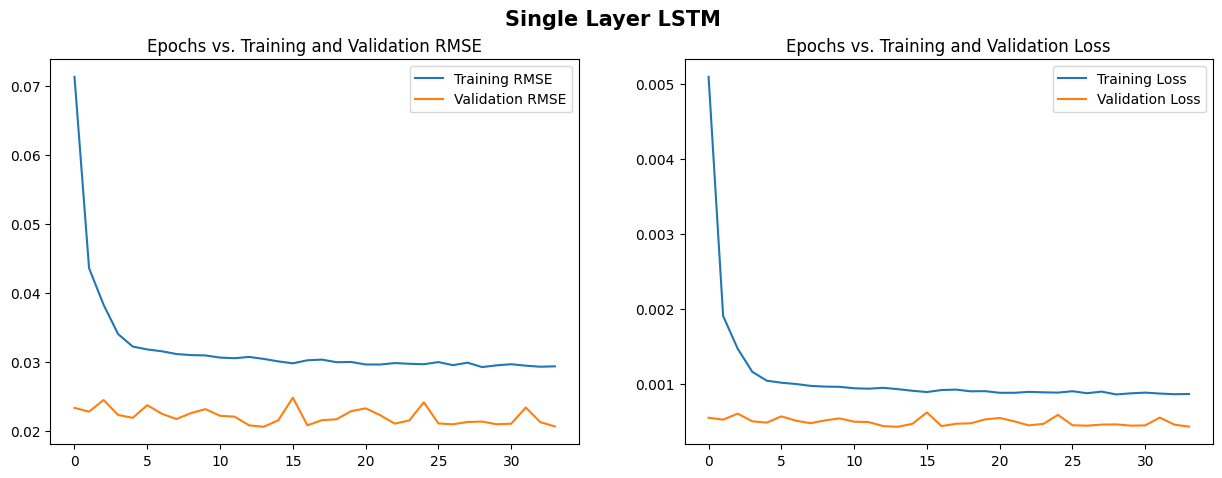

In [ ]:
plot_model_rmse_and_loss(history,"Single Layer LSTM")

In [ ]:
predictions = model_LSTM.predict(xtest)
predictions = scaler.inverse_transform(predictions)
singleLSTM_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
print(f"Root Mean Squarred Error for Single Layer LSTM = {singleLSTM_rmse}")

110/110 [==============================] - 3s 22ms/step
Root Mean Squarred Error for Single Layer LSTM = 71.47716636740277


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout, Conv1D, Flatten, SimpleRNN
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
optimizer = tf.keras.optimizers.Adam()
early_stopping = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)]

In [ ]:
model_StackedLSTM = Sequential()
model_StackedLSTM.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model_StackedLSTM.add(LSTM(64, return_sequences=False))
model_StackedLSTM.add(Dense(64))
model_StackedLSTM.add(Dropout(0.2))
model_StackedLSTM.add(Dense(1))
model_StackedLSTM.compile(loss = loss, metrics = metric, optimizer = optimizer)
history = model_StackedLSTM.fit(xtrain, ytrain, epochs = 40, validation_data =(xval , yval), callbacks = early_stopping)

Epoch 1/40
876/876 [==============================] - 73s 79ms/step - loss: 0.0049 - root_mean_squared_error: 0.0701 - val_loss: 8.9824e-04 - val_root_mean_squared_error: 0.0300
Epoch 2/40
876/876 [==============================] - 50s 57ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 5.1778e-04 - val_root_mean_squared_error: 0.0228
Epoch 3/40
876/876 [==============================] - 50s 57ms/step - loss: 0.0013 - root_mean_squared_error: 0.0354 - val_loss: 7.2206e-04 - val_root_mean_squared_error: 0.0269
Epoch 4/40
876/876 [==============================] - 46s 53ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 4.8083e-04 - val_root_mean_squared_error: 0.0219
Epoch 5/40
876/876 [==============================] - 50s 57ms/step - loss: 9.2563e-04 - root_mean_squared_error: 0.0304 - val_loss: 4.6490e-04 - val_root_mean_squared_error: 0.0216
Epoch 6/40
876/876 [==============================] - 47s 54ms/step - loss: 8.4419e-04 - root_mean_squared

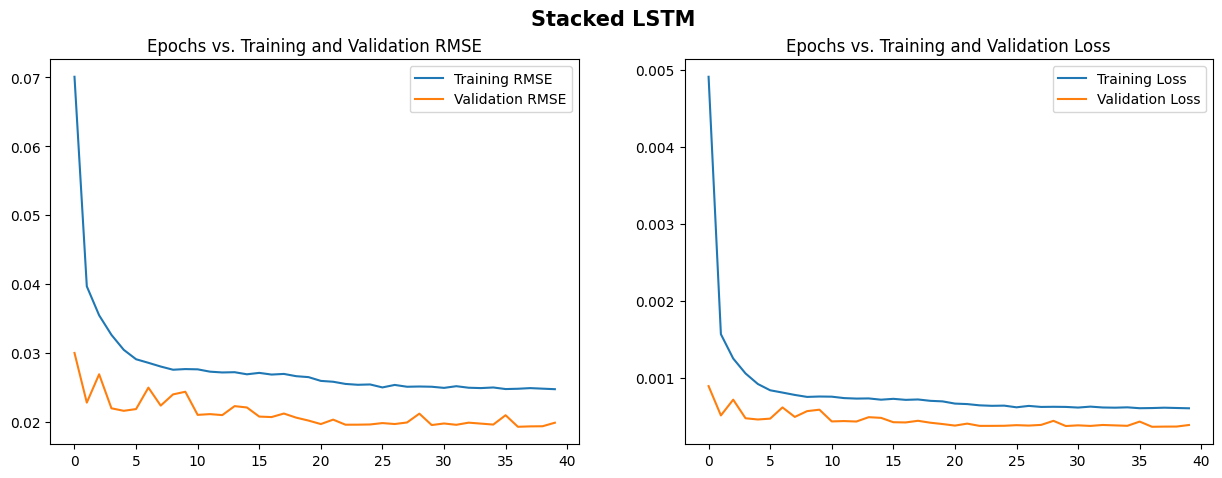

110/110 [==============================] - 2s 18ms/step

Root Mean Squarred Error for Stacked LSTM = 69.67299637608207


In [ ]:
plot_model_rmse_and_loss(history,"Stacked LSTM")
predictions = model_StackedLSTM.predict(xtest)
predictions = scaler.inverse_transform(predictions)
stackedLSTM_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
print(f"\nRoot Mean Squarred Error for Stacked LSTM = {stackedLSTM_rmse}")

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, Flatten, SimpleRNN
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
optimizer = tf.keras.optimizers.Adam()
early_stopping = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)]

In [ ]:
model_CNN = Sequential()
model_CNN.add(Conv1D(filters = 48, kernel_size =2, padding = 'causal', activation = 'relu', input_shape = (xtrain.shape[1], 1)))
model_CNN.add(Flatten())
model_CNN.add(Dense(48, activation = 'relu'))
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(1))
model_CNN.compile(loss = loss, metrics = metric, optimizer = optimizer)
history = model_CNN.fit(xtrain, ytrain, epochs = 60, validation_data =(xval , yval), callbacks = early_stopping)

Epoch 1/60
876/876 [==============================] - 4s 4ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 6.9899e-04 - val_root_mean_squared_error: 0.0264
Epoch 2/60
876/876 [==============================] - 3s 3ms/step - loss: 0.0021 - root_mean_squared_error: 0.0457 - val_loss: 4.5606e-04 - val_root_mean_squared_error: 0.0214
Epoch 3/60
876/876 [==============================] - 4s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0365 - val_loss: 4.6647e-04 - val_root_mean_squared_error: 0.0216
Epoch 4/60
876/876 [==============================] - 3s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 3.9875e-04 - val_root_mean_squared_error: 0.0200
Epoch 5/60
876/876 [==============================] - 3s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 3.8243e-04 - val_root_mean_squared_error: 0.0196
Epoch 6/60
876/876 [==============================] - 3s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val

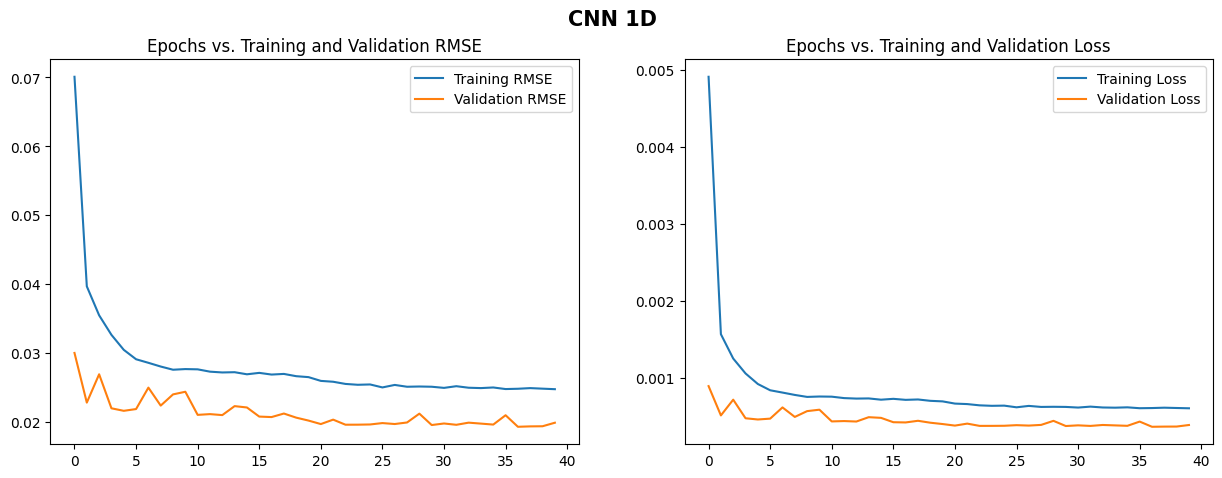

110/110 [==============================] - 0s 2ms/step

Root Mean Squarred Error for CNN 1D = 71.06840319933407


In [ ]:
plot_model_rmse_and_loss(history,"CNN 1D")
predictions = model_CNN.predict(xtest)
predictions = scaler.inverse_transform(predictions)
CNN_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
print(f"\nRoot Mean Squarred Error for CNN 1D = {CNN_rmse}")

In [ ]:
print(f"Root Mean Squarred Error for Single Layer LSTM = {singleLSTM_rmse}")
print(f"Root Mean Squarred Error for Stacked LSTM = {stackedLSTM_rmse}")
print(f"Root Mean Squarred Error for CNN 1D = {CNN_rmse}")

Root Mean Squarred Error for Single Layer LSTM = 71.47716636740277
Root Mean Squarred Error for Stacked LSTM = 69.67299637608207
Root Mean Squarred Error for CNN 1D = 71.06840319933407
